In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
import statsmodels.api as sm

In [150]:
Baseball_data = pd.read_csv("baseball_hitters_assignment2.csv")
Baseball_data

,Hitter'sName,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,446,33,20,NaN
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,632,43,10,475.0
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,880,82,14,480.0
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,200,11,3,500.0
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,805,40,4,91.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Willie McGee,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,325,9,3,700.0
318,Willie Randolph,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,313,381,20,875.0
319,Wayne Tolleson,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,37,113,7,385.0
320,Willie Upshaw,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,1314,131,12,960.0


In [151]:
# Problem A
# 1.Identify rows with missing data points and eliminate them
Baseball_data.replace(np.inf, np.nan, inplace=True)
Baseball_data.dropna(inplace=True)

# resetting the indices
Baseball_data = Baseball_data.reset_index(drop = True)
print('\nNumber of rows and columns in the data set: ',Baseball_data.shape)
Baseball_data


Number of rows and columns in the data set:  (263, 19)


,Hitter'sName,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,632,43,10,475.0
1,Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,880,82,14,480.0
2,Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,200,11,3,500.0
3,Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,805,40,4,91.5
4,Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,282,421,25,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Willie McGee,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,325,9,3,700.0
259,Willie Randolph,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,313,381,20,875.0
260,Wayne Tolleson,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,37,113,7,385.0
261,Willie Upshaw,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,1314,131,12,960.0


correlation: 0.40065699438268587


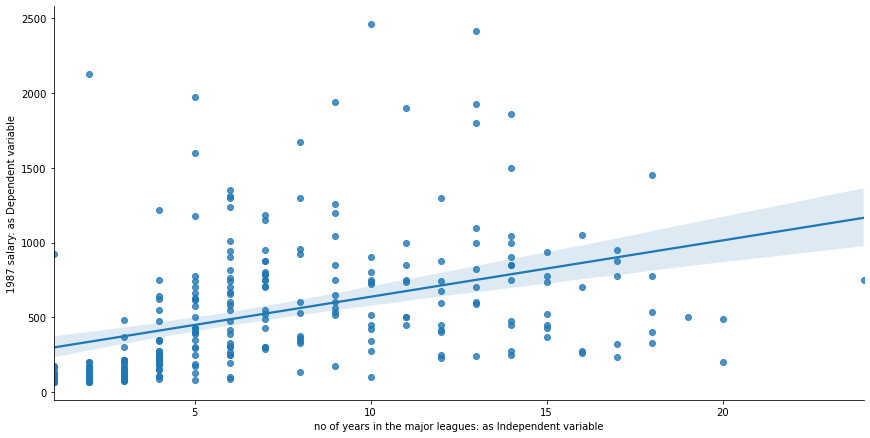

In [152]:
sns.lmplot(x='x7',y='y',data=Baseball_data,aspect=2,height=6)
plt.xlabel('no of years in the major leagues: as Independent variable')
plt.ylabel('1987 salary: as Dependent variable')

Baseball_data[['x7','y']]
correlation = Baseball_data['y'].corr(Baseball_data['x7'])
print('correlation:',correlation)

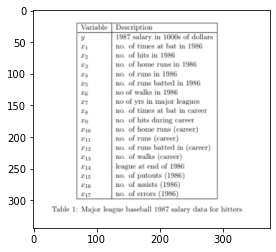

In [116]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
## Read Images
img = mpimg.imread('baseball.png')
## Output Images
plt.imshow(img)


In [5]:
#2. Fit a Simple Linear Regression (SLR) model between response variable y (1987 salary) and x7(no of years in the major leagues)
x= Baseball_data['x7']
y= Baseball_data['y']
x = sm.add_constant(x)
slr_model = sm.OLS(y,x)
slr_model_fit = slr_model.fit()
print(slr_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     49.91
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.46e-11
Time:                        16:15:24   Log-Likelihood:                -1957.1
No. Observations:                 263   AIC:                             3918.
Df Residuals:                     261   BIC:                             3925.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        260.2341     46.636      5.580      0.0

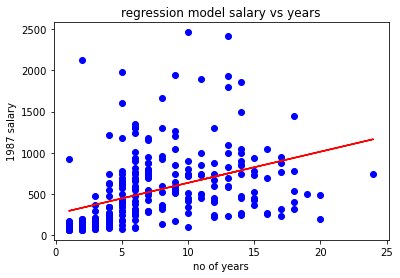

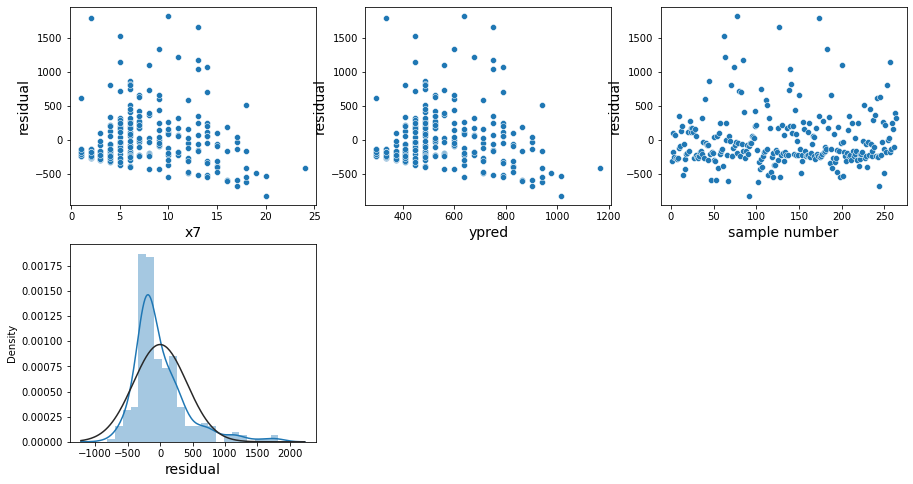

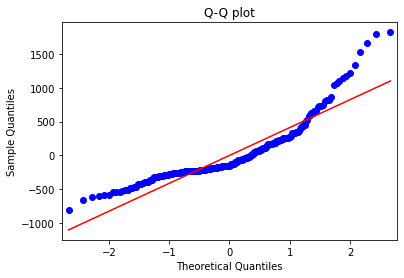

In [7]:
#plotting
plt.figure(num=1)
plt.plot(x.x7,y,linestyle="None", marker="o",color = 'b')
plt.plot(x.x7, slr_model_fit.predict(), color = 'r')
plt.title('regression model salary vs years')
plt.xlabel('no of years')
plt.ylabel('1987 salary')

plt.figure(num=2, figsize=(15,8))

plt.subplot(2,3,1)
sns.scatterplot(x.x7, slr_model_fit.resid)
plt.xlabel('x7', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(2,3,2)
sns.scatterplot(slr_model_fit.predict(), slr_model_fit.resid)
plt.xlabel('ypred', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(2,3,3)
sns.scatterplot(np.arange(1, Baseball_data.shape[0]+1), slr_model_fit.resid)
plt.xlabel('sample number', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(2,3,4)
sns.distplot(slr_model_fit.resid, fit=stats.norm)
plt.xlabel('residual', fontsize=14)

#qq-plot
sm.qqplot(slr_model_fit.resid,line='s')
plt.title("Q-Q plot")

import warnings
warnings.filterwarnings("ignore")


In [8]:
print('from the plots above it is clear that this model is not adequate as the variable x7 does not fit good for the model')

from the plots above it is clear that this model is not adequate as the variable x7 does not fit good for the model


In [9]:
## 3.  Multiple Linear Regression (MLR) model
X = Baseball_data[['x7']]
X['sqr_x7'] = Baseball_data['x7']**2
Y =Baseball_data['y']
X=sm.add_constant(X)
mlr_model = sm.OLS(y,X)
mlr_model_fit = mlr_model.fit()
print(mlr_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     44.87
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.82e-17
Time:                        16:15:36   Log-Likelihood:                -1941.1
No. Observations:                 263   AIC:                             3888.
Df Residuals:                     260   BIC:                             3899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.4425     70.264     -0.818      0.4

Text(0.5, 1.0, 'Q-Q plot')

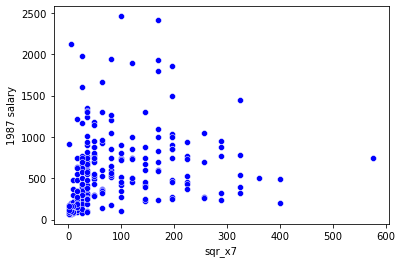

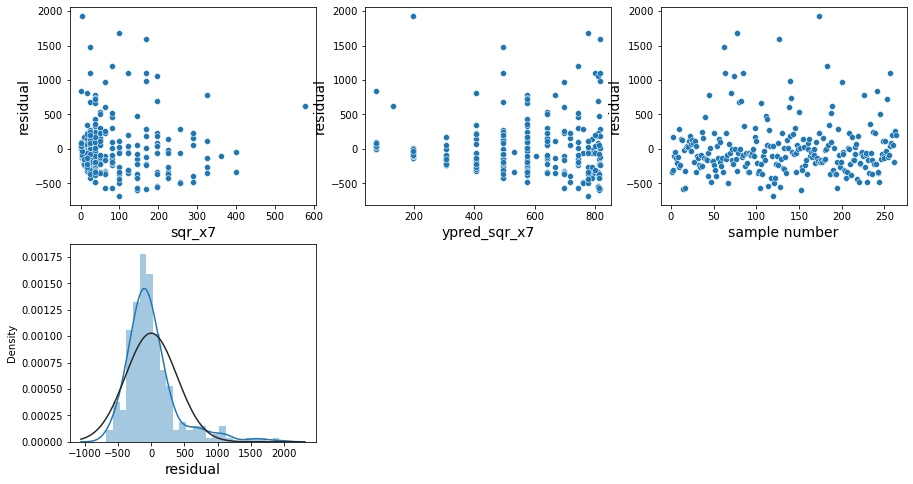

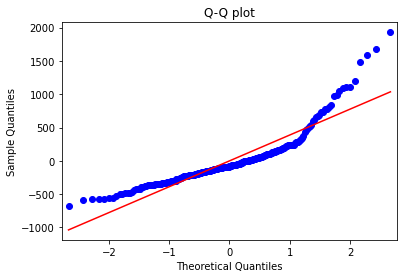

In [10]:
sns.scatterplot(X.sqr_x7,Y,color='b')
plt.xlabel('sqr_x7')
plt.ylabel('1987 salary')
#plt.plot(X.sqr_x7,mlr_model_fit.predict(),color='r')

plt.figure(num=2, figsize=(15,8))

plt.subplot(2,3,1)
sns.scatterplot(X.sqr_x7, mlr_model_fit.resid)
plt.xlabel('sqr_x7', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(2,3,2)
sns.scatterplot(mlr_model_fit.predict(), mlr_model_fit.resid)
plt.xlabel('ypred_sqr_x7', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(2,3,3)
sns.scatterplot(np.arange(1, Baseball_data.shape[0]+1), mlr_model_fit.resid)
plt.xlabel('sample number', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(2,3,4)
sns.distplot(mlr_model_fit.resid, fit=stats.norm)
plt.xlabel('residual', fontsize=14)

#qq-plot
sm.qqplot(mlr_model_fit.resid,line='s')
plt.title("Q-Q plot")


In [11]:
## 4. comparision between 2 and 3
print('MLR with squaring of x7 resulted to be better model as compared to SLR (x7 only), as the R2 value (0.257) for MLR is \n greater than R2 value (0.161) of SLR.')

MLR with squaring of x7 resulted to be better model as compared to SLR (x7 only), as the R2 value (0.257) for MLR is 
 greater than R2 value (0.161) of SLR.


In [12]:
#part-B
Baseball_data.head()

,Hitter'sName,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,632,43,10,475.0
1,Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,880,82,14,480.0
2,Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,200,11,3,500.0
3,Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,805,40,4,91.5
4,Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,282,421,25,750.0


In [13]:
Baseball_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hitter'sName  263 non-null    object 
 1   x1            263 non-null    int64  
 2   x2            263 non-null    int64  
 3   x3            263 non-null    int64  
 4   x4            263 non-null    int64  
 5   x5            263 non-null    int64  
 6   x6            263 non-null    int64  
 7   x7            263 non-null    int64  
 8   x8            263 non-null    int64  
 9   x9            263 non-null    int64  
 10  x10           263 non-null    int64  
 11  x11           263 non-null    int64  
 12  x12           263 non-null    int64  
 13  x13           263 non-null    int64  
 14  x14           263 non-null    object 
 15  x15           263 non-null    int64  
 16  x16           263 non-null    int64  
 17  x17           263 non-null    int64  
 18  y             263 non-null    

In [14]:
#EDA 
# since the there are too many multiple refressors we can group the regressor into 8 and 8 independent variables against y as
# target variable

#sns.pairplot(Baseball_data)

# grouping first 8 regressors as Base_eight and last 9 as Base_nine
# x7 column is exluded since it is not a good regressor
print(Baseball_data.columns)
Base_eight = Baseball_data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6','x8','x9','y']]
print(Base_eight.head())
Base_nine = Baseball_data[['x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17','y']]
print(Base_nine.head())

Index(['Hitter'sName', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'y'],
      dtype='object')
    x1   x2  x3  x4  x5  x6    x8    x9      y
0  315   81   7  24  38  39  3449   835  475.0
1  479  130  18  66  72  76  1624   457  480.0
2  496  141  20  65  78  37  5628  1575  500.0
3  321   87  10  39  42  30   396   101   91.5
4  594  169   4  74  51  35  4408  1133  750.0
   x10  x11  x12  x13 x14  x15  x16  x17      y
0   69  321  414  375   N  632   43   10  475.0
1   63  224  266  263   A  880   82   14  480.0
2  225  828  838  354   N  200   11    3  500.0
3   12   48   46   33   N  805   40    4   91.5
4   19  501  336  194   A  282  421   25  750.0


Text(0, 0.5, 'y')

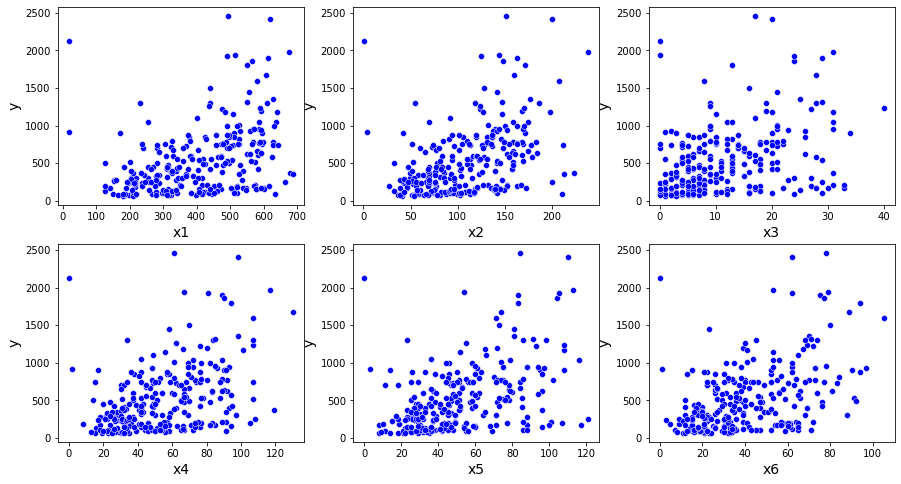

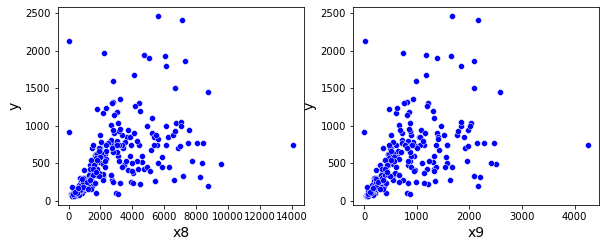

In [15]:
# first consider Base_eight data( first 8 variables)
#checking the linearity with y 
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.scatterplot(Base_eight.x1,Base_eight.y,color='b')
plt.xlabel('x1', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.subplot(2,3,2)
sns.scatterplot(Base_eight.x2,Base_eight.y,color='b')
plt.xlabel('x2', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.subplot(2,3,3)
sns.scatterplot(Base_eight.x3,Base_eight.y,color='b')
plt.xlabel('x3', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.subplot(2,3,4)
sns.scatterplot(Base_eight.x4,Base_eight.y,color='b')
plt.xlabel('x4', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.subplot(2,3,5)
sns.scatterplot(Base_eight.x5,Base_eight.y,color='b')
plt.xlabel('x5', fontsize=14)
plt.ylabel('y', fontsize=14)


plt.subplot(2,3,6)
sns.scatterplot(Base_eight.x6,Base_eight.y,color='b')
plt.xlabel('x6', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.figure(num=2, figsize=(15,8))
plt.subplot(2,3,1)
sns.scatterplot(Base_eight.x8,Base_eight.y,color='b')
plt.xlabel('x8', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.subplot(2,3,2)
sns.scatterplot(Base_eight.x9,Base_eight.y,color='b')
plt.xlabel('x9', fontsize=14)
plt.ylabel('y', fontsize=14)

there are no strong correlation among variables against target
(263, 9)


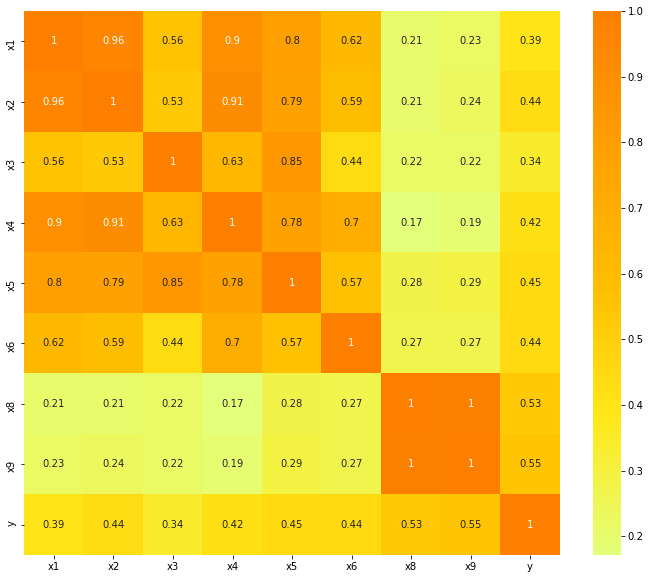

In [16]:
# correlation plot
corr = Base_eight.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap = 'Wistia', annot= True);
print('there are no strong correlation among variables against target')
print(Base_eight.shape)

In [17]:
#Correlation with output variable
cor_target = abs(corr["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)
print('We will only select features which has correlation of above 0.5 with the output variable y.')
#therefore new Base_eight will contain only two regressors.
new_Base_eight = Base_eight[['x8','x9','y']]
new_Base_eight.head()

x8    0.526135
x9    0.548910
y     1.000000
Name: y, dtype: float64
We will only select features which has correlation of above 0.5 with the output variable y.


,x8,x9,y
0,3449,835,475.0
1,1624,457,480.0
2,5628,1575,500.0
3,396,101,91.5
4,4408,1133,750.0


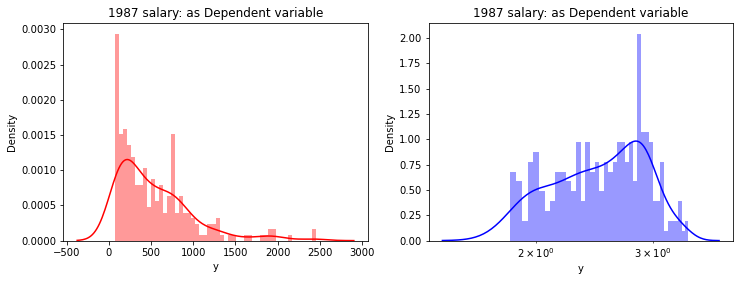

In [18]:
## checking for normal distribution dependent variable y(1987 salary)
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.distplot(new_Base_eight['y'],bins=50,color='r',ax=ax)
ax.set_title('1987 salary: as Dependent variable')

ax=f.add_subplot(122)
sns.distplot(np.log10(new_Base_eight['y']),bins=40,color='b',ax=ax)
ax.set_title('1987 salary: as Dependent variable')
ax.set_xscale('log');

Lamda value used for Normal transformation:0.23415512829586652


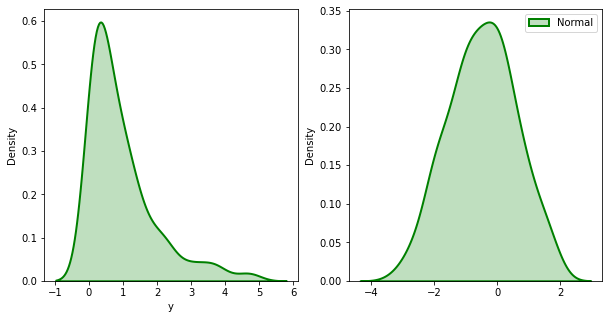

In [19]:
# use og Box-Cox transformation inorder to transform non-normal distribution to normal distribution of 
# dependent variable/target variable y(1987 salary).
new_Base_eight['y'] = np.random.exponential(size = 263)
fit_y, fitted_lambda = stats.boxcox(new_Base_eight['y'])
fig, ax = plt.subplots(1,2)
sns.distplot(new_Base_eight['y'], hist = False, kde=True, kde_kws={'shade':True, 'linewidth':2},
            label = 'Non_Normal',color='green', ax = ax[0])
sns.distplot(fit_y, hist=False, kde=True, kde_kws={'shade':True,'linewidth':2},
            label = 'Normal', color='green', ax=ax[1])
plt.legend(loc="upper right")
fig.set_figheight(5)
fig.set_figwidth(10)

print(f'Lamda value used for Normal transformation:{fitted_lambda}')

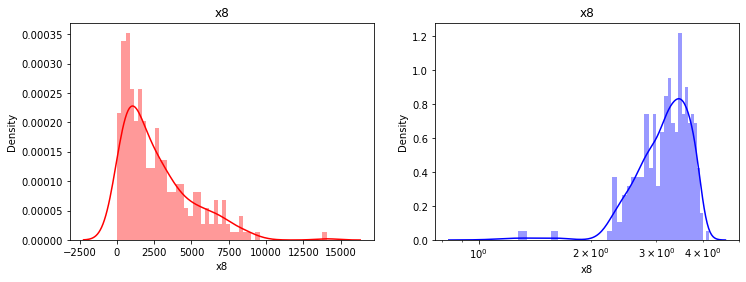

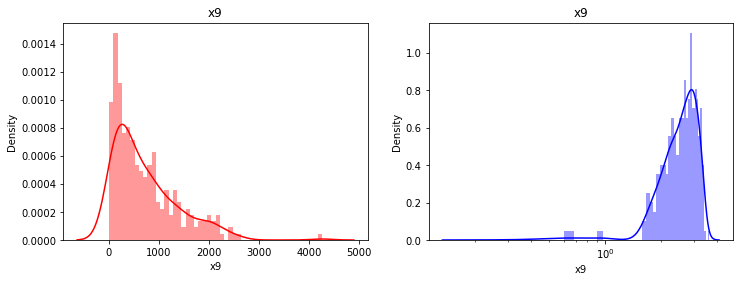

In [20]:
f= plt.figure(num=1, figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(new_Base_eight['x8'],bins=50,color='r',ax=ax)
ax.set_title('x8')
ax=f.add_subplot(122)
sns.distplot(np.log10(new_Base_eight['x8']),bins=40,color='b',ax=ax)
ax.set_title('x8')
ax.set_xscale('log');

f = plt.figure(num=2, figsize=(12,4))
ax=f.add_subplot(121)
sns.distplot(new_Base_eight['x9'],bins=50,color='r',ax=ax)
ax.set_title('x9')
ax=f.add_subplot(122)
sns.distplot(np.log10(new_Base_eight['x9']),bins=40,color='b',ax=ax)
ax.set_title('x9')
ax.set_xscale('log');

Lamda value used for x8 Normal transformation:0.307783881892165
Lamda value used for x9 Normal transformation:0.2371254805132316


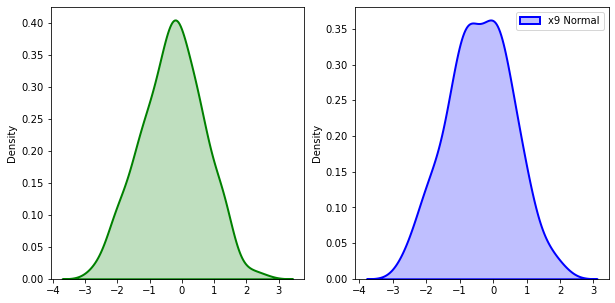

In [21]:
new_Base_eight['x8'] = np.random.exponential(size = 263)
fit_x8, fitted_x8_lambda = stats.boxcox(new_Base_eight['x8'])

new_Base_eight['x9'] = np.random.exponential(size = 263)
fit_x9, fitted_x9_lambda = stats.boxcox(new_Base_eight['x9'])

fig, ax = plt.subplots(1,2)
sns.distplot(fit_x8, hist=False, kde=True, kde_kws={'shade':True,'linewidth':2},
            label = 'x8 Normal', color='green',ax=ax[0])
sns.distplot(fit_x9, hist=False, kde=True, kde_kws={'shade':True,'linewidth':2},
            label = 'x9 Normal', color='blue',ax=ax[1])
plt.legend()
fig.set_figheight(5)
fig.set_figwidth(10)

print(f'Lamda value used for x8 Normal transformation:{fitted_x8_lambda}')
print(f'Lamda value used for x9 Normal transformation:{fitted_x9_lambda}')

In [22]:
print('now new_Base_eight is transformed to normal distribution,it requires inverse transformation to \n interpret the results later in the same unit')
new_Base_eight.x8 = scipy.special.inv_boxcox(fit_x8,fitted_x8_lambda)
new_Base_eight.x9 = scipy.special.inv_boxcox(fit_x9,fitted_x9_lambda)
new_Base_eight.y  = scipy.special.inv_boxcox(fit_y,fitted_lambda)
new_Base_eight.head()

now new_Base_eight is transformed to normal distribution,it requires inverse transformation to 
 interpret the results later in the same unit


,x8,x9,y
0,0.199041,1.941910,3.516082
1,0.114817,0.449452,0.230876
2,1.484074,0.190541,1.106256
3,0.753487,0.426683,0.131171
4,0.750845,0.082722,0.076303


In [118]:
X = new_Base_eight[['x8','x9']]
Y = new_Base_eight[['y']]
# splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
model_eight = LinearRegression()
model_eight.fit(x_train,y_train)
r_sq = model_eight.score(x_train,y_train)
print('coefficient of determination:', r_sq)
print('intercept:',model_eight.intercept_)
print('slope:',model_eight.coef_)
print('This model cannot be considered')

coefficient of determination: 0.0032751382285661768
intercept: [0.93129974]
slope: [[-0.03892681  0.04135475]]
This model cannot be considered


In [24]:
x_train=sm.add_constant(x_train)
mod_eight = sm.OLS(y_train,x_train)
mod_eight_fit = mod_eight.fit()
print(mod_eight_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2974
Date:                Fri, 22 Apr 2022   Prob (F-statistic):              0.743
Time:                        16:17:06   Log-Likelihood:                -255.46
No. Observations:                 184   AIC:                             516.9
Df Residuals:                     181   BIC:                             526.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9313      0.125      7.423      0.0

In [25]:
## without transformation
Base_eight = Base_eight[['x8','x9','y']]
x=Base_eight[['x8','x9']]
y=Base_eight[['y']]
# splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression 
model = LinearRegression().fit(x_train,y_train)
r_sq = model.score(x_train,y_train)
print('coefficient of determinantion:', r_sq)
print('intercept:',model.intercept_)
print('slope:',model.coef_)

coefficient of determinantion: 0.34261775816861495
intercept: [309.48831016]
slope: [[-0.52165889  2.23336246]]


In [26]:
x_train=sm.add_constant(x_train)
mod = sm.OLS(y_train,x_train)
mod_fit = mod.fit()
print(mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     47.17
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           3.25e-17
Time:                        16:17:11   Log-Likelihood:                -1333.5
No. Observations:                 184   AIC:                             2673.
Df Residuals:                     181   BIC:                             2683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        309.4883     40.646      7.614      0.0

222    1827.653127
103    1736.085266
16     1932.621162
108    1863.386926
75     5066.028699
dtype: float64

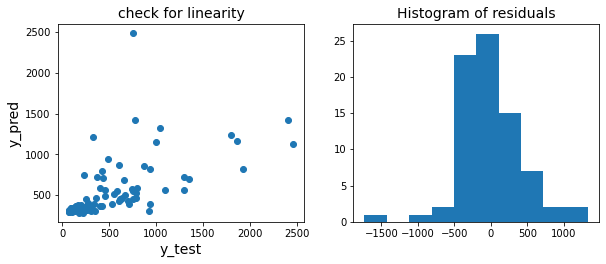

<Figure size 432x288 with 0 Axes>

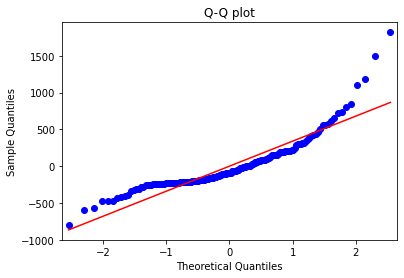

In [27]:
y_pred = model.predict(x_test)
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test',fontsize=14), plt.ylabel('y_pred',fontsize=14)
plt.title('check for linearity',fontsize=14)
plt.subplot(2,3,2)
plt.hist(y_test - y_pred)
plt.title('Histogram of residuals',fontsize=14)

#qq-plot
plt.figure(num=3)
sm.qqplot(mod_fit.resid,line='s')
plt.title("Q-Q plot")
## model equation 
model_pred = model.intercept_ + model.coef_[0,0]*x_train.iloc[:,0] + model.coef_[0,1]*x_train.iloc[:,1]
model_pred.head()
#plt.plot(x_train.iloc[:,0],y_train,linestyle="None", marker="o",color = 'b')
#plt.plot(x_train.iloc[:,0], model_pred, color = 'r')

In [28]:
## now group Base_nine 
Base_nine.drop(Base_nine.columns[4],axis=1,inplace=True)
print(Base_nine.head())

   x10  x11  x12  x13  x15  x16  x17      y
0   69  321  414  375  632   43   10  475.0
1   63  224  266  263  880   82   14  480.0
2  225  828  838  354  200   11    3  500.0
3   12   48   46   33  805   40    4   91.5
4   19  501  336  194  282  421   25  750.0


Text(0, 0.5, 'y')

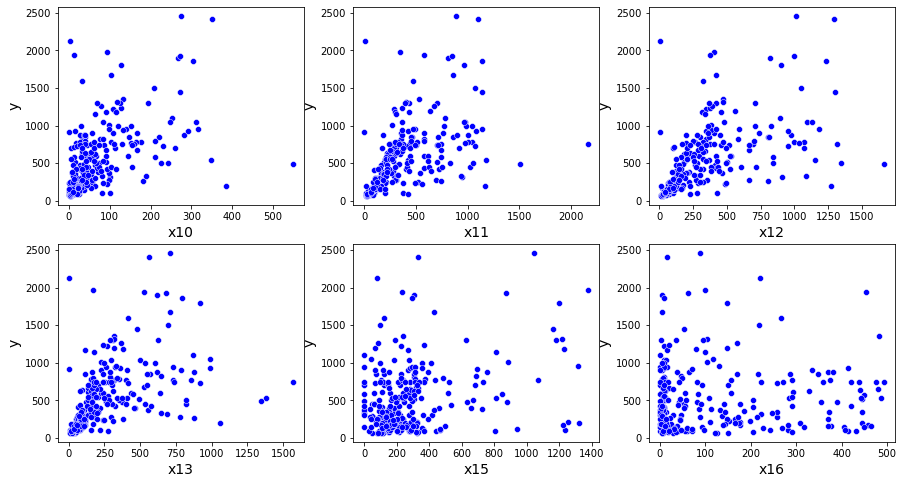

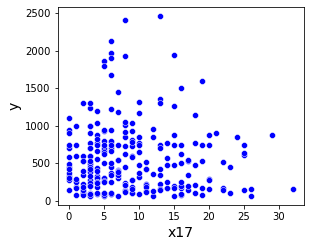

In [29]:
#checking the linearity with y 
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.scatterplot(Base_nine.x10,Base_nine.y,color='b')
plt.xlabel('x10', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.subplot(2,3,2)
sns.scatterplot(Base_nine.x11,Base_nine.y,color='b')
plt.xlabel('x11', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.subplot(2,3,3)
sns.scatterplot(Base_nine.x12,Base_nine.y,color='b')
plt.xlabel('x12', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.subplot(2,3,4)
sns.scatterplot(Base_nine.x13,Base_nine.y,color='b')
plt.xlabel('x13', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.subplot(2,3,5)
sns.scatterplot(Base_nine.x15,Base_nine.y,color='b')
plt.xlabel('x15', fontsize=14)
plt.ylabel('y', fontsize=14)


plt.subplot(2,3,6)
sns.scatterplot(Base_nine.x16,Base_nine.y,color='b')
plt.xlabel('x16', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.figure(num=2, figsize=(15,8))
plt.subplot(2,3,1)
sns.scatterplot(Base_nine.x17,Base_nine.y,color='b')
plt.xlabel('x17', fontsize=14)
plt.ylabel('y', fontsize=14)

(263, 8)


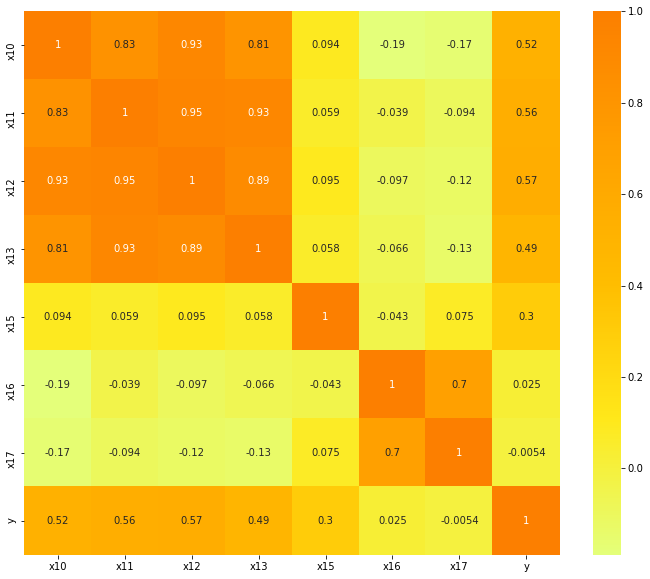

In [30]:
# correlation plot
corr = Base_nine.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap = 'Wistia', annot= True);
#print('there are no correlation among variables')
print(Base_nine.shape)

In [31]:
#Correlation with output variable
cor_target = abs(corr["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)
print('We will only select features which has correlation of above 0.5 with the output variable y.')
print('Therefore new Base_eight will contain only three regressors.')
new_Base_nine = Base_nine[['x10','x11','x12','y']]
new_Base_nine.head()

x10    0.524931
x11    0.562678
x12    0.566966
y      1.000000
Name: y, dtype: float64
We will only select features which has correlation of above 0.5 with the output variable y.
Therefore new Base_eight will contain only three regressors.


,x10,x11,x12,y
0,69,321,414,475.0
1,63,224,266,480.0
2,225,828,838,500.0
3,12,48,46,91.5
4,19,501,336,750.0


In [32]:
x=new_Base_nine[['x10','x11','x12']]
y=new_Base_nine[['y']]
# splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression 
grp_nine = LinearRegression().fit(x_train,y_train)
r_sq = grp_nine.score(x_train,y_train)
print('coefficient of determinantion:', r_sq)
print('intercept:',grp_nine.intercept_)
print('slope:',grp_nine.coef_)

coefficient of determinantion: 0.2758770820380029
intercept: [261.65257011]
slope: [[-0.24191938  0.858365   -0.06897908]]


In [33]:
x_train=sm.add_constant(x_train)
basemodel = sm.OLS(y_train,x_train)
basemodel_fit = basemodel.fit()
print(basemodel_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     22.86
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.38e-12
Time:                        16:17:48   Log-Likelihood:                -1342.4
No. Observations:                 184   AIC:                             2693.
Df Residuals:                     180   BIC:                             2706.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        261.6526     41.099      6.366      0.0

222    362.567350
103    344.700451
16     362.567350
108    393.834425
75     393.834425
dtype: float64

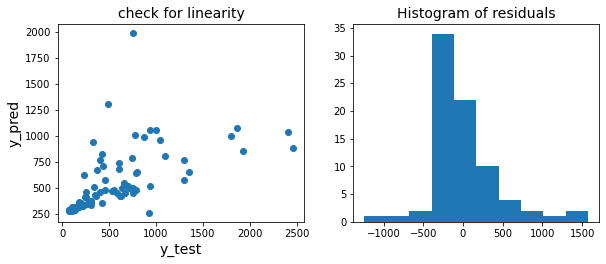

<Figure size 432x288 with 0 Axes>

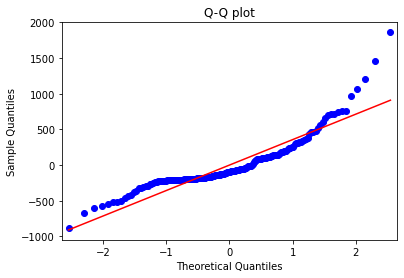

In [34]:
y_pred = grp_nine.predict(x_test)
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test',fontsize=14), plt.ylabel('y_pred',fontsize=14)
plt.title('check for linearity',fontsize=14)
plt.subplot(2,3,2)
plt.hist(y_test - y_pred)
plt.title('Histogram of residuals',fontsize=14)

#qq-plot
plt.figure(num=3)
sm.qqplot(basemodel_fit.resid,line='s')
plt.title("Q-Q plot")
## model equation 
model_pred = model.intercept_ + model.coef_[0,0]*x_train.iloc[:,0] + model.coef_[0,1]*x_train.iloc[:,1]
model_pred.head()

In [35]:
##encoding of categorical regressor x14
Base_cat = Baseball_data.x14
Base_cat.head()
new_x14 = pd.get_dummies(Base_cat)
print(new_x14.head())
new_x14.drop(columns='A', inplace=True)
new_x14.rename(columns={'N': 'new_N'}, inplace=True)
new_x14.head()
new_x14 = pd.get_dummies(Base_cat, prefix='x14', drop_first=True)

   A  N
0  0  1
1  1  0
2  0  1
3  0  1
4  1  0


Text(0, 0.5, 'y')

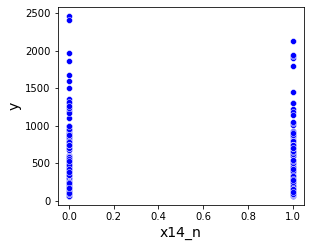

In [36]:
#checking the linearity with y 
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.scatterplot(new_x14.x14_N,Baseball_data.y,color='b')
plt.xlabel('x14_n', fontsize=14)
plt.ylabel('y', fontsize=14)

In [37]:
x= new_x14.x14_N.values.reshape(-1,1)
y=Baseball_data.y
# splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression 
catmodel = LinearRegression().fit(x_train,y_train)
r_sq = catmodel.score(x_train,y_train)
print('coefficient of determinantion:', r_sq)
print('intercept:',catmodel.intercept_)
print('slope:',catmodel.coef_)

coefficient of determinantion: 0.00040055558875462527
intercept: 529.342643678161
slope: [-16.80141687]


In [161]:
# considering all highly correlated features among Base_eight and Base_nine groups.
sel_fe = Baseball_data[['x8','x9','x10','x11','x12','y']]
sel_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x8      263 non-null    int64  
 1   x9      263 non-null    int64  
 2   x10     263 non-null    int64  
 3   x11     263 non-null    int64  
 4   x12     263 non-null    int64  
 5   y       263 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 12.5 KB


In [39]:
x=sel_fe[['x8','x9','x10','x11','x12']]
y=sel_fe[['y']]
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression 
sel_femodel = LinearRegression().fit(x_train,y_train)
r_sq = sel_femodel.score(x_train,y_train)
print('coefficient of determinantion:', r_sq)
print('intercept:',sel_femodel.intercept_)
print('slope:',sel_femodel.coef_)

coefficient of determinantion: 0.3609133295200302
intercept: [312.8096422]
slope: [[-0.56688424  2.06023623  0.91054592  0.77054009 -0.2837576 ]]


In [40]:
x_train=sm.add_constant(x_train)
catmodel = sm.OLS(y_train,x_train)
sel_femodel_fit = catmodel.fit()
print(sel_femodel_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     20.10
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           7.13e-16
Time:                        16:18:30   Log-Likelihood:                -1330.9
No. Observations:                 184   AIC:                             2674.
Df Residuals:                     178   BIC:                             2693.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        312.8096     41.365      7.562      0.0

Text(0.5, 1.0, 'Q-Q plot')

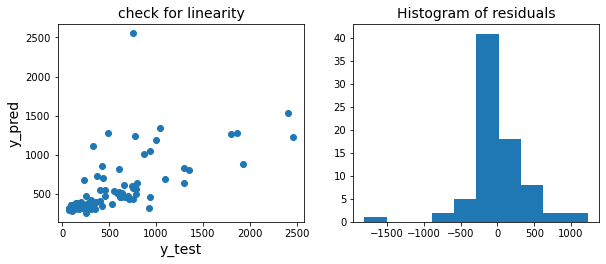

<Figure size 432x288 with 0 Axes>

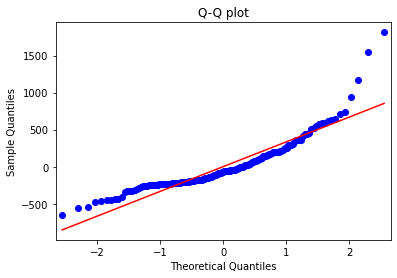

In [41]:
y_pred = sel_femodel.predict(x_test)
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test',fontsize=14), plt.ylabel('y_pred',fontsize=14)
plt.title('check for linearity',fontsize=14)
plt.subplot(2,3,2)
plt.hist(y_test - y_pred)
plt.title('Histogram of residuals',fontsize=14)

#qq-plot
plt.figure(num=3)
sm.qqplot(sel_femodel_fit.resid,line='s')
plt.title("Q-Q plot")

In [42]:
## squaring of variables(x8,x9,x10,x11,x12).
X1 = Baseball_data[['x8','x9','x10','x11','x12']]
X1['sqr_x8'] = Baseball_data['x8']**2
X1['sqr_x9'] = Baseball_data['x9']**2
X1['sqr_x10']= Baseball_data['x10']**2
X1['sqr_x11']= Baseball_data['x11']**2
X1['sqr_x12']= Baseball_data['x12']**2
X1 = X1.drop(['x8','x9','x10','x11','x12'],axis=1)
Y1 = Baseball_data['y']
sqr_y = Baseball_data['y']**2

In [43]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X1,Y1,test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression 
sqr_model = LinearRegression().fit(x_train,y_train)
r_sq = sqr_model.score(x_train,y_train)
print('coefficient of determinantion:', r_sq)
print('intercept:',sqr_model.intercept_)
print('slope:',sqr_model.coef_)

print('squaring of variables does not result in good model')

coefficient of determinantion: 0.24438286639521312
intercept: 411.9062707326853
slope: [-4.75155960e-05  7.87090887e-04  9.42124118e-03  4.48184361e-04
 -1.06981734e-03]
squaring of variables does not result in good model


In [65]:
## now trying with log transformation
log_x8 = np.log10(Baseball_data.x8)
log_x9 = np.log10(Baseball_data.x9)
log_x10= np.log10(Baseball_data.x10)
log_x11= np.log10(Baseball_data.x11)
log_x12= np.log10(Baseball_data.x12)
log_y  = np.log10(Baseball_data.y)

In [66]:
## log transformation
## on trial and error method x12 column gives better R2 value than others
x = log_x12.values.reshape(-1,1)
y = log_y.values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression 
log_model = LinearRegression().fit(x_train,y_train)
r_sq = log_model.score(x_train,y_train)
print('coefficient of determinantion:', r_sq)
print('intercept:',log_model.intercept_)
print('slope:',log_model.coef_)

coefficient of determinantion: 0.5273142235507744
intercept: [1.19646994]
slope: [[0.59844604]]


In [67]:
x_train=sm.add_constant(x_train)
logmodel = sm.OLS(y_train,x_train)
logmodel_fit = logmodel.fit()
print(logmodel_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     203.0
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.97e-31
Time:                        17:54:19   Log-Likelihood:                -13.553
No. Observations:                 184   AIC:                             31.11
Df Residuals:                     182   BIC:                             37.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1965      0.098     12.190      0.0

Text(0.5, 1.0, 'Q-Q plot')

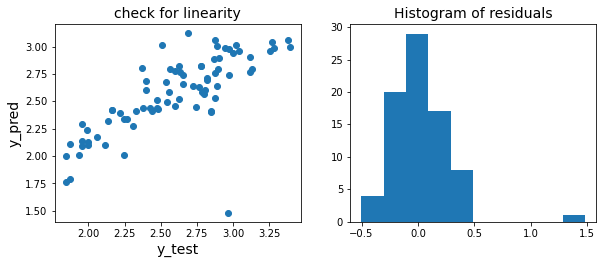

<Figure size 432x288 with 0 Axes>

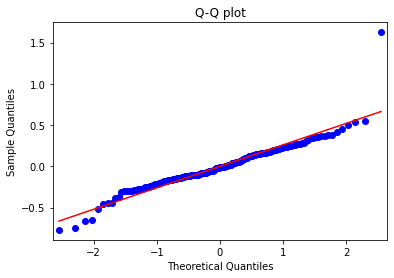

In [68]:
y_pred = log_model.predict(x_test)
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test',fontsize=14), plt.ylabel('y_pred',fontsize=14)
plt.title('check for linearity',fontsize=14)
plt.subplot(2,3,2)
plt.hist(y_test - y_pred)
plt.title('Histogram of residuals',fontsize=14)

#qq-plot
plt.figure(num=3)
sm.qqplot(logmodel_fit.resid,line='s')
plt.title("Q-Q plot")

In [160]:
##log of Base_data for x8,x9,x10,x11,x12, transforming these variables to log and building the model
log_base = Baseball_data[['x8','x9','x10','x11','x12']]
log_base['log_x8']=log_x8
log_base['log_x9']=log_x9
#log_base['log_x10']=log_x10
log_base['log_x11']=log_x11
log_base['log_x12']=log_x12
log_base = log_base.drop(['x8','x9','x10','x11','x12'],axis=1)
X2 = log_base
Y2  = log_y
log_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   log_x8   263 non-null    float64
 1   log_x9   263 non-null    float64
 2   log_x11  263 non-null    float64
 3   log_x12  263 non-null    float64
dtypes: float64(4)
memory usage: 8.3 KB


In [49]:
x = X2
y = Y2
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression 
betr_model = LinearRegression().fit(x_train,y_train)
r_sq = betr_model.score(x_train,y_train)
print('coefficient of determinantion:', r_sq)
print('intercept:',betr_model.intercept_)
print('slope:',betr_model.coef_)

coefficient of determinantion: 0.5625913176905017
intercept: 2.672110479991027
slope: [-2.09293428  1.92299443  0.23793459  0.44023874]


In [50]:
x_train=sm.add_constant(x_train)
betr_logmodel = sm.OLS(y_train,x_train)
betr_logmodel_fit = betr_logmodel.fit()
print(betr_logmodel_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     57.56
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           3.72e-31
Time:                        16:30:33   Log-Likelihood:                -6.4177
No. Observations:                 184   AIC:                             22.84
Df Residuals:                     179   BIC:                             38.91
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6721      0.459      5.816      0.0

Text(0.5, 1.0, 'Q-Q plot')

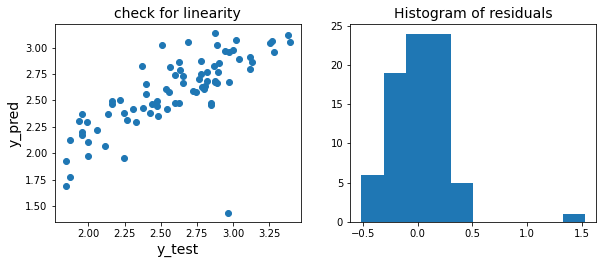

<Figure size 432x288 with 0 Axes>

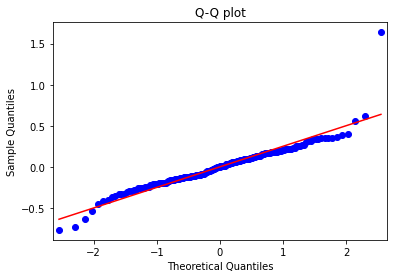

In [51]:
y_pred = betr_model.predict(x_test)
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test',fontsize=14), plt.ylabel('y_pred',fontsize=14)
plt.title('check for linearity',fontsize=14)
plt.subplot(2,3,2)
plt.hist(y_test - y_pred)
plt.title('Histogram of residuals',fontsize=14)

#qq-plot
plt.figure(num=3)
sm.qqplot(betr_logmodel_fit.resid,line='s')
plt.title("Q-Q plot")

In [156]:
print(' Out of all the models log_base model is the best model with R2 score 0.563 and Adj_R2 0.553\n Thus this model can perform better than other models to predict the salary of the hitters.\n However, this model has R² score of 56.30%,\n which means that thers is still about 44% unknown factors that are affecting salary range for hitters.  ')
print('\nx11 column which is no. of runs in career 42.2%  has no effect on the dependent variable')

 Out of all the models log_base model is the best model with R2 score 0.563 and Adj_R2 0.553
 Thus this model can perform better than other models to predict the salary of the hitters.
 However, this model has R² score of 56.30%,
 which means that thers is still about 44% unknown factors that are affecting salary range for hitters.  

x11 column which is no. of runs in career 42.2%  has no effect on the dependent variable
